In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# Učitavanje originalne datoteke podataka
df = pd.read_csv('/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/data_2016.csv')
df['broj_djece_gostiju']= df['broj_djece_gostiju'].astype('int64')
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,Ukupan_broj_gostiju,ukupan_broj_gostiju
0,0,2016-01-01,2015-08-19,2016-01-02,NaT,2,0,RUS,2,1,79.581782,Check-Out,1316956,1034048,2,2
1,0,2016-01-01,2015-11-25,2016-01-02,NaT,2,2,RUS,2,6,122.435957,Check-Out,1316957,1077228,4,4
2,0,2016-01-01,2015-12-27,2016-01-02,2016-01-01,2,0,PRT,2,2,96.582869,No-Show,1316958,1086216,2,2
3,0,2016-01-01,2016-01-01,2016-01-03,NaT,2,0,ARG,2,1,65.451832,Check-Out,1316959,1056231,2,2
4,0,2016-01-01,2015-10-12,2016-01-03,2015-12-22,2,2,PRT,2,4,154.779468,Canceled,1316960,1092895,4,4


In [3]:
df.describe()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,rezervacija_id,gost_id,Ukupan_broj_gostiju,ukupan_broj_gostiju
count,56623.000000,56623,56623,20324,56623.000000,56623.000000,56623.000000,56623.000000,56623.000000,5.662300e+04,5.662300e+04,56623.000000,56623.000000
mean,0.672147,2016-07-28 15:36:19.912756480,2016-04-16 20:30:35.890009344,2016-04-18 17:24:04.676244992,1.853734,0.112516,1.706126,1.525846,120.370156,1.371030e+06,1.053471e+06,1.966250,1.966250
min,0.000000,2016-01-01 00:00:00,2014-01-28 00:00:00,2015-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,40.003037,1.316956e+06,1.000001e+06,1.000000,1.000000
25%,0.000000,2016-05-03 00:00:00,2016-01-09 00:00:00,2016-01-20 00:00:00,2.000000,0.000000,2.000000,1.000000,80.495665,1.340396e+06,1.026760e+06,2.000000,2.000000
50%,1.000000,2016-08-13 00:00:00,2016-04-10 00:00:00,2016-04-03 00:00:00,2.000000,0.000000,2.000000,1.000000,109.000000,1.369370e+06,1.053080e+06,2.000000,2.000000
75%,1.000000,2016-10-31 00:00:00,2016-08-17 00:00:00,2016-07-19 00:00:00,2.000000,0.000000,2.000000,2.000000,142.142111,1.402708e+06,1.080444e+06,2.000000,2.000000
max,1.000000,2016-12-31 00:00:00,2016-12-31 00:00:00,2016-12-31 00:00:00,4.000000,10.000000,4.000000,8.000000,7351.295691,1.417312e+06,1.107288e+06,12.000000,12.000000
std,0.469435,NaN,NaN,NaN,0.493371,0.411204,0.676823,1.171795,65.521812,3.194998e+04,3.095089e+04,0.651841,0.651841


In [4]:
# Adding a new column for the total number of guests
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']

# Saving the updated dataframe back to a CSV file
df.to_csv('/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/data_2016.csv', index=False)


In [5]:
dnevni_pregled = df.groupby(df['datum_dolaska'].dt.date).agg(
    ukupan_broj_gostiju=pd.NamedAgg(column='ukupan_broj_gostiju', aggfunc='sum'),
    broj_djece_gostiju=pd.NamedAgg(column='broj_djece_gostiju', aggfunc='sum'),
    broj_odraslih_gostiju=pd.NamedAgg(column='broj_odraslih_gostiju', aggfunc='sum')
).reset_index()

dnevni_pregled.to_csv('/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/pregled_po_danima_2016.csv', index=False)

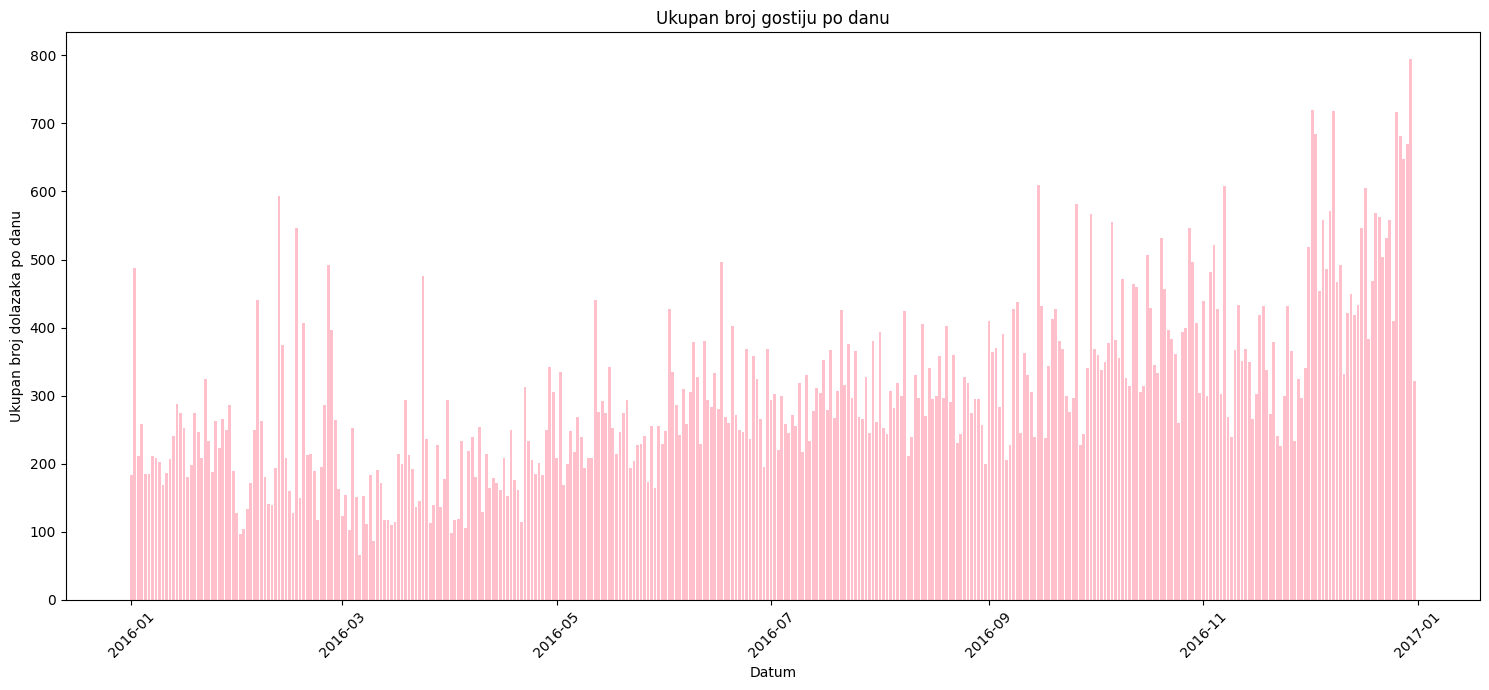

In [6]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(dnevni_pregled['datum_dolaska'], dnevni_pregled['ukupan_broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj dolazaka po danu')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()



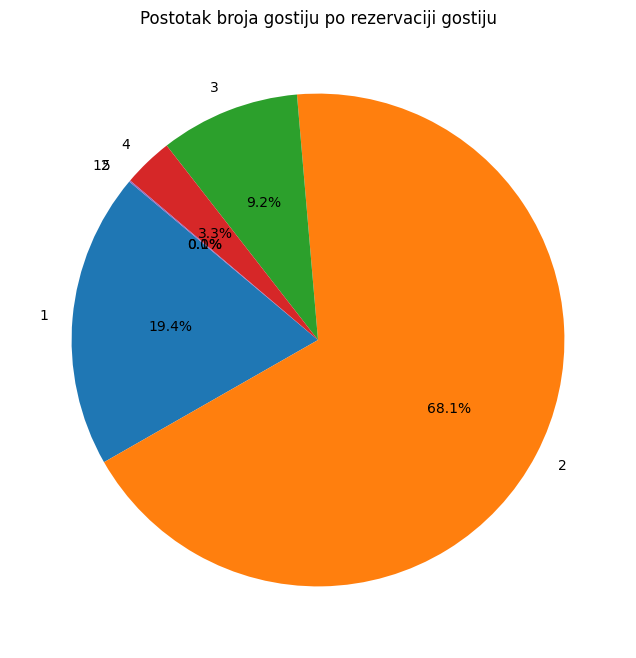

In [7]:
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = df['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju')
plt.show()

In [8]:
#racunanje broja ljudi u hotelu na dani natum (ne ukljucuje otkazane rezervacije)
occupancy = df[df['datum_otkazivanja_rezervacije'].isna()]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()


/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5687/3678237350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5687/3678237350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


,datum,broj_gostiju
0,2016-01-01,110
1,2016-01-02,391
2,2016-01-03,442
3,2016-01-04,509
4,2016-01-05,405


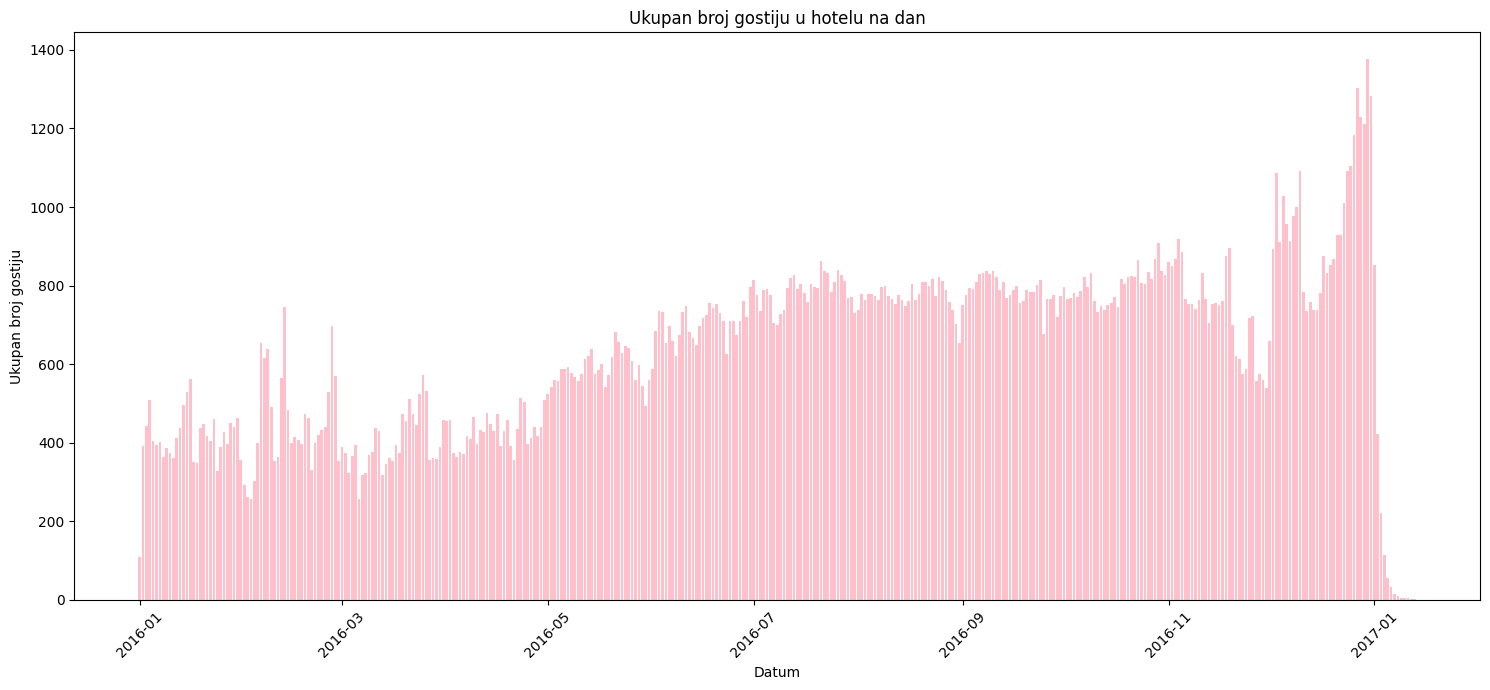

In [9]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()


/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5687/3828035767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5687/3828035767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


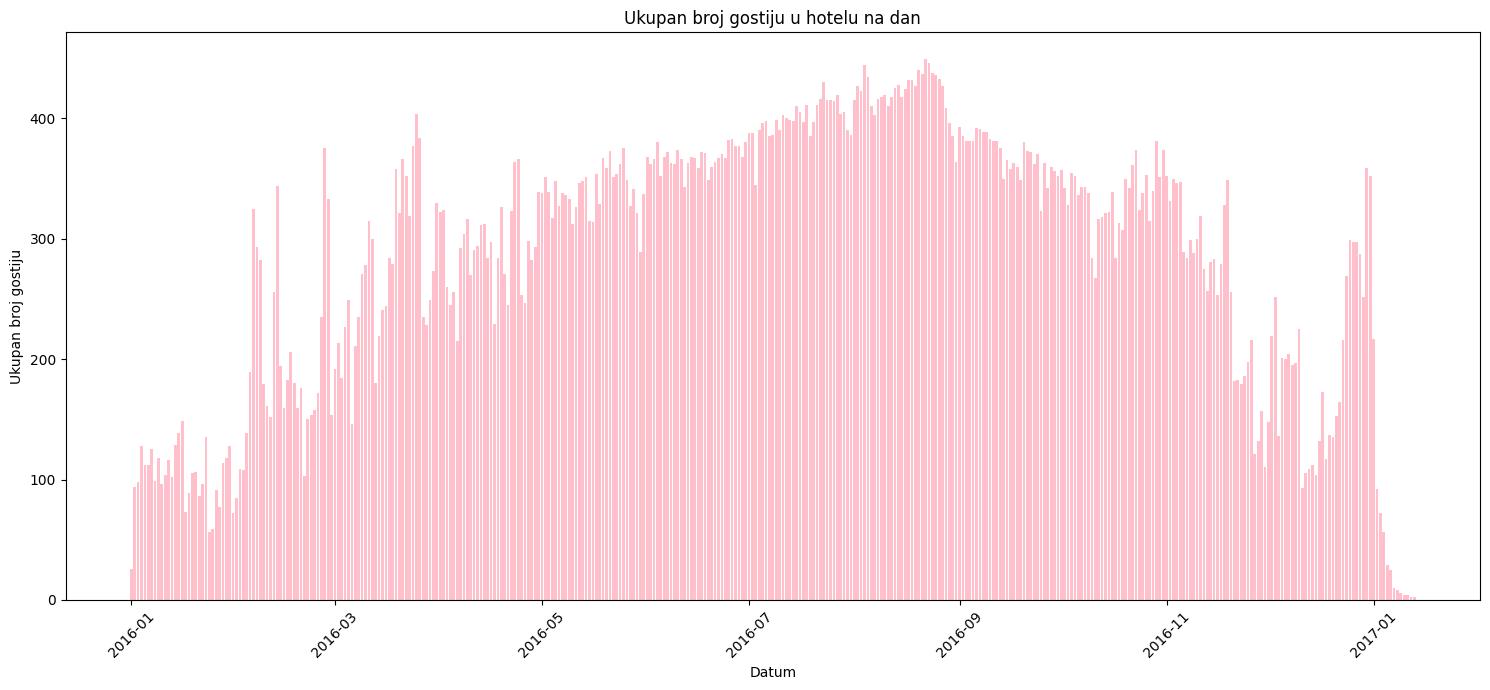

In [10]:
hotel0 = df[df['hotel_id']==0]
occupancy = hotel0[(hotel0['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5687/3446052201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5687/3446052201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


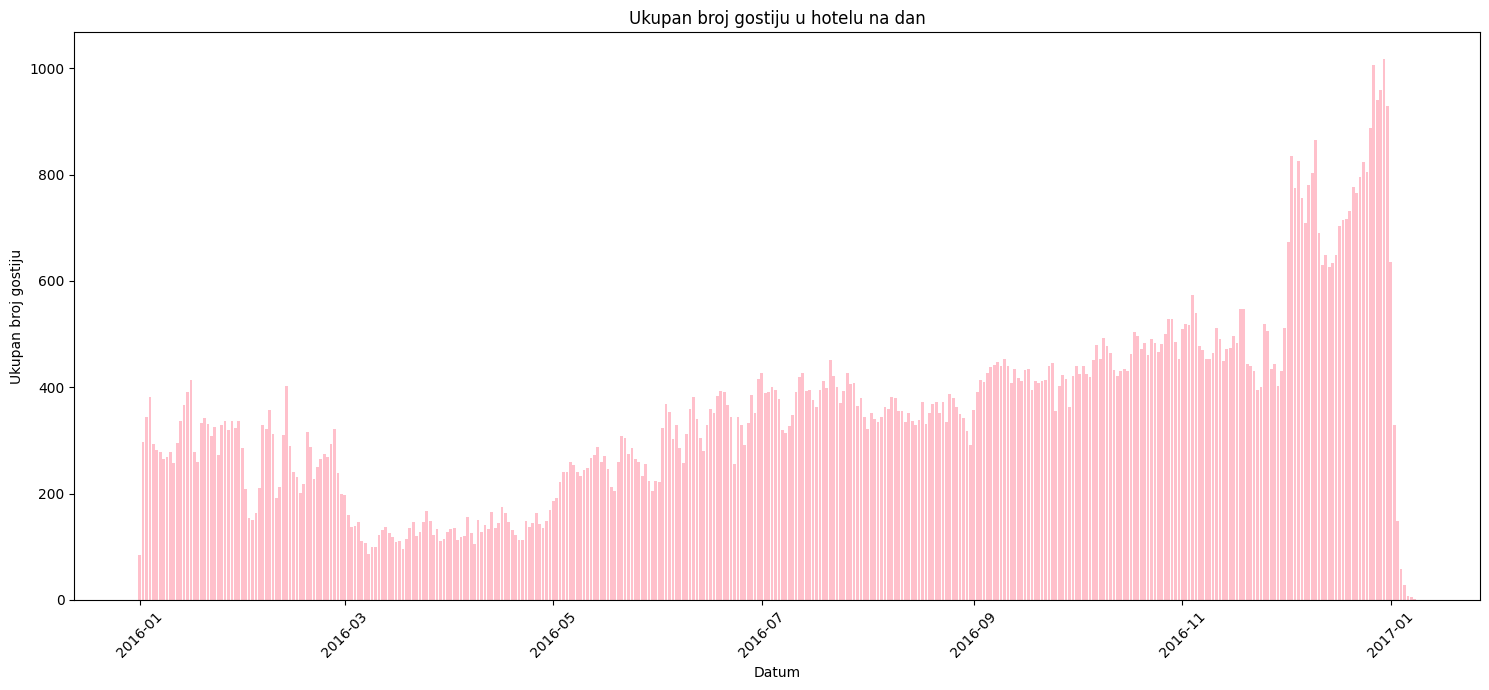

In [11]:
hotel1 = df[df['hotel_id']==1]
occupancy = hotel1[(hotel1['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

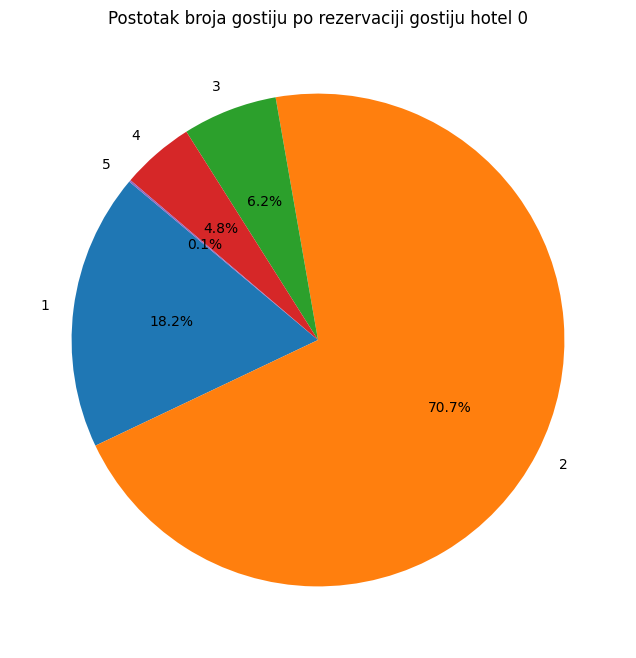

In [12]:
hotel0 = df[df['hotel_id']==0]
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = hotel0['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju hotel 0')
plt.show()

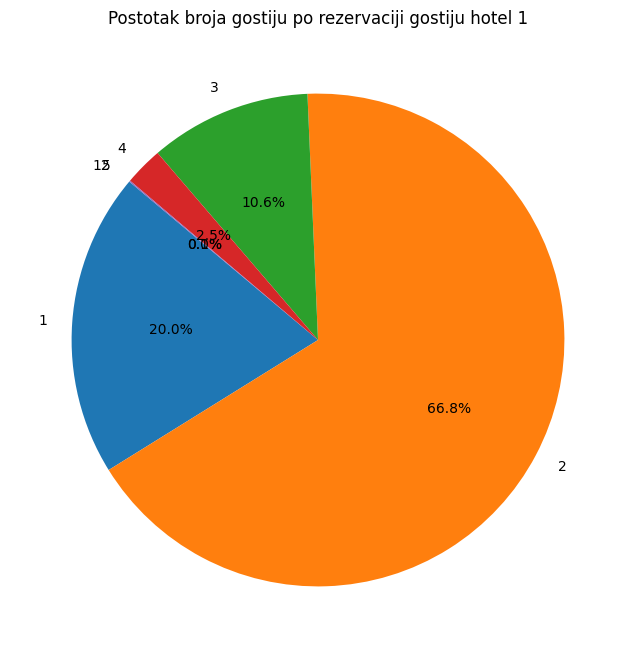

In [14]:
hotel1 = df[df['hotel_id']==1]
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = hotel1['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju hotel 1')
plt.show()